<a href="https://colab.research.google.com/github/rgalea2809/g6-sig-v2/blob/main/Mapas_cuantitativos_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import warnings
!pip install geopandas
!pip install rioxarray
#!pip install esda
!pip install pysal
!pip install contextily
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 3.7 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.3/53.3 KB 3.0 MB/s eta 0:0

In [3]:
import matplotlib.pyplot as plt  # Graphics
from matplotlib import colors
import seaborn  # Graphics
import geopandas  # Spatial data manipulation
import pandas  # Tabular data manipulation
#import rioxarray  # Surface data manipulation
#import xarray  # Surface data manipulation
#from pysal.explore import esda  # Exploratory Spatial analytics
#from pysal.lib import weights  # Spatial weights
import contextily  # Background tiles

In [4]:
lads = geopandas.read_file(
    "https://raw.githubusercontent.com/MetziLuna/Datos_SV/main/Crimen/HR2018.geojson"
).set_index("fid")

In [5]:
db = (geopandas.GeoDataFrame(lads))
db.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 262 entries, 1 to 271
Data columns (total 76 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   NOM_DPTO                             262 non-null    object  
 1   COD_DPTO                             262 non-null    object  
 2   NOM_MUN                              262 non-null    object  
 3   COD_MUN                              262 non-null    object  
 4   COD_MUN4                             262 non-null    object  
 5   TASA_POBR                            262 non-null    float64 
 6   POBR_FISDL                           262 non-null    object  
 7   POB_TOTAL                            262 non-null    int64   
 8   POB_HOMB                             262 non-null    int64   
 9   POB_MUJER                            262 non-null    int64   
 10  densidad                             262 non-null    int64   
 11  _dig_POB_20

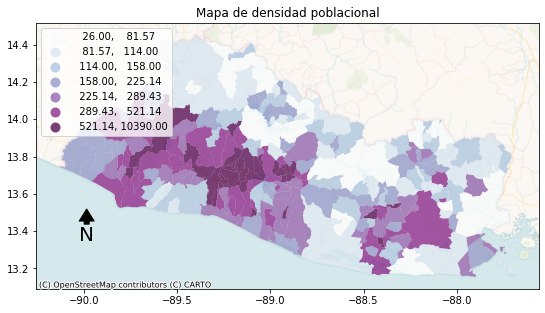

In [6]:
# Set up figure and a single axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Build choropleth
plt.title("Mapa de densidad poblacional")
db.plot(
    column="densidad",
    cmap="BuPu",
    scheme="quantiles",
    k=7,
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    legend=True,
    legend_kwds=dict(loc=2),
    ax=ax,
    zorder=5,
)
    
x, y, arrow_length = 0.1, 0.3, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)

# Add basemap
contextily.add_basemap(
    ax,
    crs=db.crs,
    source=contextily.providers.CartoDB.VoyagerNoLabels,
)

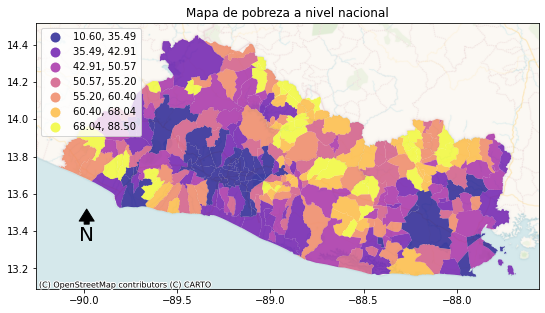

In [7]:
# Set up figure and a single axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Build choropleth
plt.title("Mapa de pobreza a nivel nacional")
db.plot(
    column="el_salvador_Pobreza_FISDL",
    cmap="plasma",
    scheme="quantiles",
    k=7,
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    legend=True,
    legend_kwds=dict(loc=2),
    ax=ax,
    zorder=5,
)
    
x, y, arrow_length = 0.1, 0.3, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)

# Add basemap
contextily.add_basemap(
    ax,
    crs=db.crs,
    source=contextily.providers.CartoDB.VoyagerNoLabels,
)

As in the previous chapter, we require a spatial weights matrix to implement our statistic. Here, we will use eight nearest neighbors for the sake of the example, but the discussion in the earlier chapter on weights applies in this context, and other criteria would be valid too. We also row-standardize them:


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


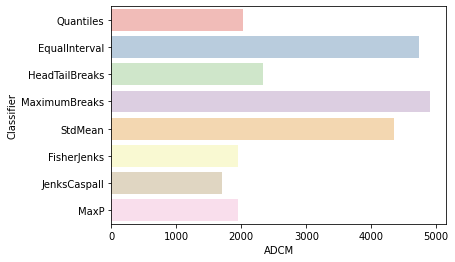

In [ ]:
!pip install mapclassify
import mapclassify
import numpy
#Intervalos iguales
ei5 = mapclassify.EqualInterval(db["HR2018"], k=5)
ei5
#Cuantiles
q5 = mapclassify.Quantiles(db.HR2018, k=5)
q5
#Mean standard deviation
msd = mapclassify.StdMean(db["HR2018"])
msd

mb5 = mapclassify.MaximumBreaks(db["HR2018"], k=5)
mb5
#Boxplot
bp = mapclassify.BoxPlot(db["HR2018"])
bp

ht = mapclassify.HeadTailBreaks(db["HR2018"])
ht
#Jenks caspall
numpy.random.seed(12345)
jc5 = mapclassify.JenksCaspall(db["HR2018"], k=5)
jc5
#FisherJenks
numpy.random.seed(12345)
fj5 = mapclassify.FisherJenks(db["HR2018"], k=5)
fj5

mp5 = mapclassify.MaxP(db["HR2018"], k=5)
mp5
# Bunch classifier objects
class5 = q5, ei5, ht, mb5, msd, fj5, jc5, mp5
#print(class5)
# Collect ADCM for each classifier
fits = numpy.array([c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pandas.DataFrame(fits)
# Add classifier names
adcms["classifier"] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ["ADCM", "Classifier"]
ax = seaborn.barplot(
    y="Classifier", x="ADCM", data=adcms, palette="Pastel1"
)

In [ ]:
#print(fits)
#print(adcms)
print(class5)
#print(q5)

(Quantiles               

    Interval       Count
------------------------
[  0.00,   0.00] |    64
(  0.00,  20.42] |    41
( 20.42,  32.63] |    52
( 32.63,  51.64] |    52
( 51.64, 497.78] |    53, EqualInterval           

    Interval       Count
------------------------
[  0.00,  99.56] |   251
( 99.56, 199.11] |     9
(199.11, 298.67] |     1
(298.67, 398.22] |     0
(398.22, 497.78] |     1, HeadTailBreaks          

    Interval       Count
------------------------
[  0.00,  34.07] |   166
( 34.07,  69.29] |    67
( 69.29, 118.39] |    20
(118.39, 197.17] |     7
(197.17, 385.44] |     1
(385.44, 497.78] |     1, MaximumBreaks           

    Interval       Count
------------------------
[  0.00, 100.03] |   251
(100.03, 169.35] |     8
(169.35, 229.60] |     1
(229.60, 385.44] |     1
(385.44, 497.78] |     1, StdMean                 

    Interval       Count
------------------------
(  -inf, -55.54] |     0
(-55.54, -10.73] |     0
(-10.73,  78.87] |   243
( 78.87, 123.68

In [ ]:
# Append class values as a separate column
db["Quantiles"] = q5.yb
db["Equal Interval"] = ei5.yb
db["Head-Tail Breaks"] = ht.yb
db["Maximum Breaks"] = mb5.yb
db["Mean-Standard Deviation"] = msd.yb
db["Fisher-Jenks"] = fj5.yb
db["Jenks Caspall"] = jc5.yb
db["MaxP"] = mp5.yb

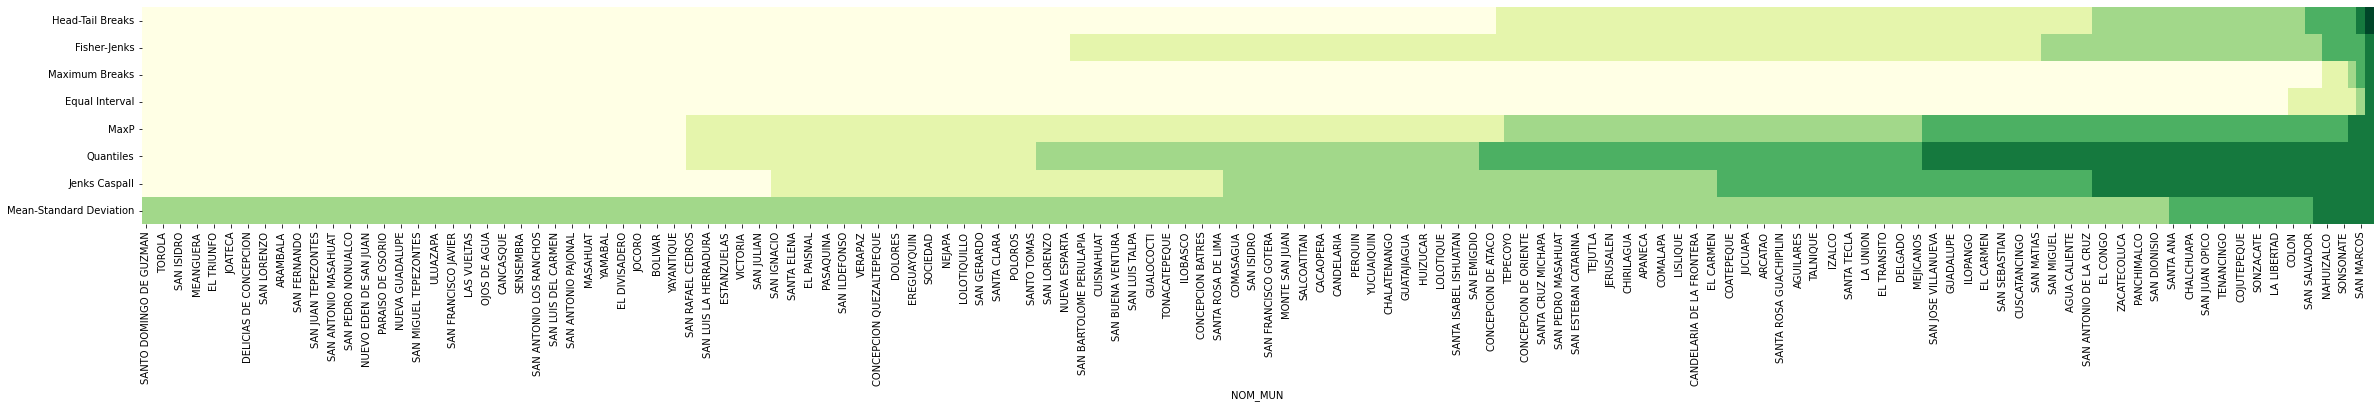

In [ ]:
f, ax = plt.subplots(1, figsize=(40, 4))
seaborn.heatmap(
    db.set_index("NOM_MUN")
    .sort_values("HR2018")[
        [
            "Head-Tail Breaks",
            "Fisher-Jenks",
            "Maximum Breaks",
            "Equal Interval",
            "MaxP",
            "Quantiles",
            "Jenks Caspall",
            "Mean-Standard Deviation",
        ]
    ]
    .T,
    cmap="YlGn",
    cbar=False,
    ax=ax,
)
ax.set_xlabel("NOM_MUN");